<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#(4.4.2.)-Fitting-the-model." data-toc-modified-id="(4.4.2.)-Fitting-the-model.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>(4.4.2.) Fitting the model.</a></span></li><li><span><a href="#(4.4.3.)-Interpreting-the-model-fit." data-toc-modified-id="(4.4.3.)-Interpreting-the-model-fit.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>(4.4.3.) Interpreting the model fit.</a></span></li><li><span><a href="#Deconstruction-of-Link" data-toc-modified-id="Deconstruction-of-Link-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Deconstruction of Link</a></span><ul class="toc-item"><li><span><a href="#How-sim-works" data-toc-modified-id="How-sim-works-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>How sim works</a></span></li></ul></li><li><span><a href="#Polynomial-regression" data-toc-modified-id="Polynomial-regression-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Polynomial regression</a></span></li></ul></li><li><span><a href="#Multivariate-models" data-toc-modified-id="Multivariate-models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Multivariate models</a></span><ul class="toc-item"><li><span><a href="#load-data" data-toc-modified-id="load-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>load data</a></span></li><li><span><a href="#(5.1.)-Spurious-association" data-toc-modified-id="(5.1.)-Spurious-association-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>(5.1.) Spurious association</a></span></li><li><span><a href="#(5.1.1.)-Multivariate-notation." data-toc-modified-id="(5.1.1.)-Multivariate-notation.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>(5.1.1.) Multivariate notation.</a></span></li><li><span><a href="#(5.1.2.)-Fitting-the-model." data-toc-modified-id="(5.1.2.)-Fitting-the-model.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>(5.1.2.) Fitting the model.</a></span></li></ul></li></ul></div>

# Linear Regression

In [ ]:
library(tidyverse)

library(rethinking)

In [ ]:
sample_mu <- rnorm( 1e4,178,20)
sample_sigma <- runif(1e4,0,50)
prior_h <- rnorm(1e4, sample_mu, sample_sigma)
dens(prior_h)

In [2]:
flist <- alist( 
    height ~ dnorm( mu , sigma ) ,
    mu ~ dnorm( 178 , 20 ) ,
    sigma ~ dunif( 0 , 50 )
)

m4.1 <- map( flist , data=d2 ) 

In [3]:
precis( m4.1)

        Mean StdDev   5.5%  94.5%
mu    154.61   0.41 153.95 155.27
sigma   7.73   0.29   7.27   8.20

## (4.4.2.) Fitting the model. 

In [65]:
data(Howell1)
d <- Howell1
d2 <- d[ d$age >= 18 , ]

In [105]:
# fit model
m4.3 <- map(
    alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a + b*weight ,
        a ~ dnorm( 156 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,
        sigma ~ dunif( 0 , 50 )
    ) ,
    data=d2 )

## (4.4.3.) Interpreting the model fit.

In [68]:
precis( m4.3)

        Mean StdDev   5.5%  94.5%
a     113.90   1.91 110.86 116.95
b       0.90   0.04   0.84   0.97
sigma   5.07   0.19   4.77   5.38

In [69]:
precis( m4.3 , corr=TRUE ) 

        Mean StdDev   5.5%  94.5%     a     b sigma
a     113.90   1.91 110.86 116.95  1.00 -0.99     0
b       0.90   0.04   0.84   0.97 -0.99  1.00     0
sigma   5.07   0.19   4.77   5.38  0.00  0.00     1

In [70]:
d2$weight.c <- d2$weight - mean(d2$weight)

In [71]:
m4.4 <- map(
    alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a + b*weight.c ,
        a ~ dnorm( 178 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,
        sigma ~ dunif( 0 , 50 )
    ) ,
    data=d2 )

In [73]:
precis(m4.4, corr=TRUE)

        Mean StdDev   5.5%  94.5% a b sigma
a     154.60   0.27 154.17 155.03 1 0     0
b       0.91   0.04   0.84   0.97 0 1     0
sigma   5.07   0.19   4.77   5.38 0 0     1

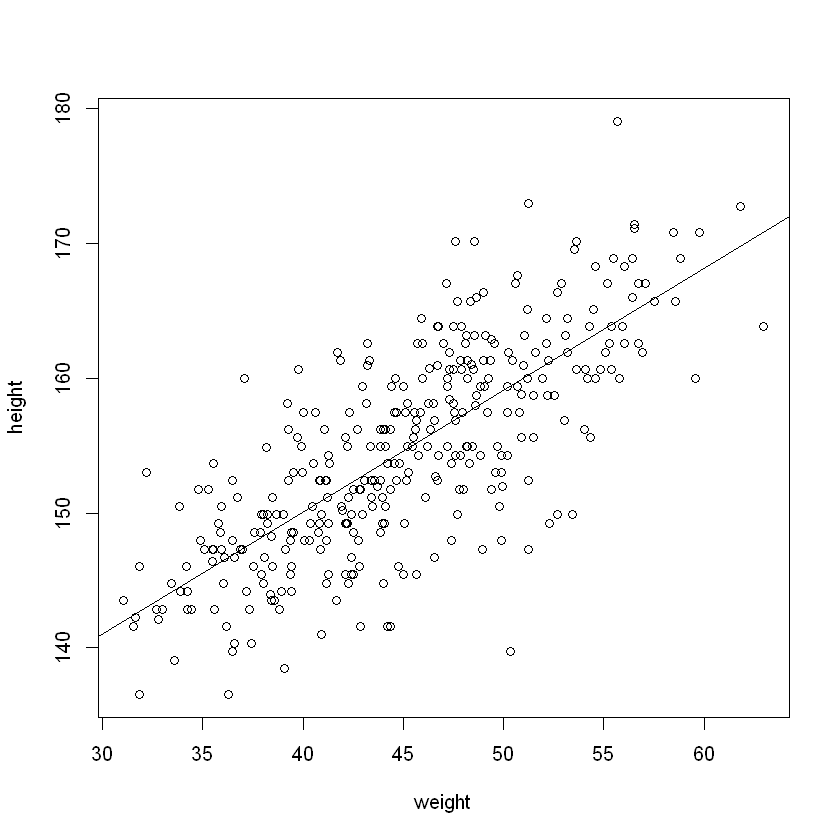

In [106]:
plot( height ~ weight , data=d2 )
abline( a=coef(m4.3)["a"] , b=coef(m4.3)["b"] )

In [112]:
post <- extract.samples(m4.3)
post[1:5,]

a,b,sigma
115.1127,0.8821691,5.005817
114.5351,0.8861420,4.742484
113.4693,0.9133732,5.054610
114.8228,0.8833386,5.069428
113.6626,0.9153261,5.078223


In [108]:
 N <- 10
dN <- d2[ 1:N , ]
mN <- map(
    alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a + b*weight ,
        a ~ dnorm( 178 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,
        sigma ~ dunif( 0 , 50 )
    ) , data=dN )

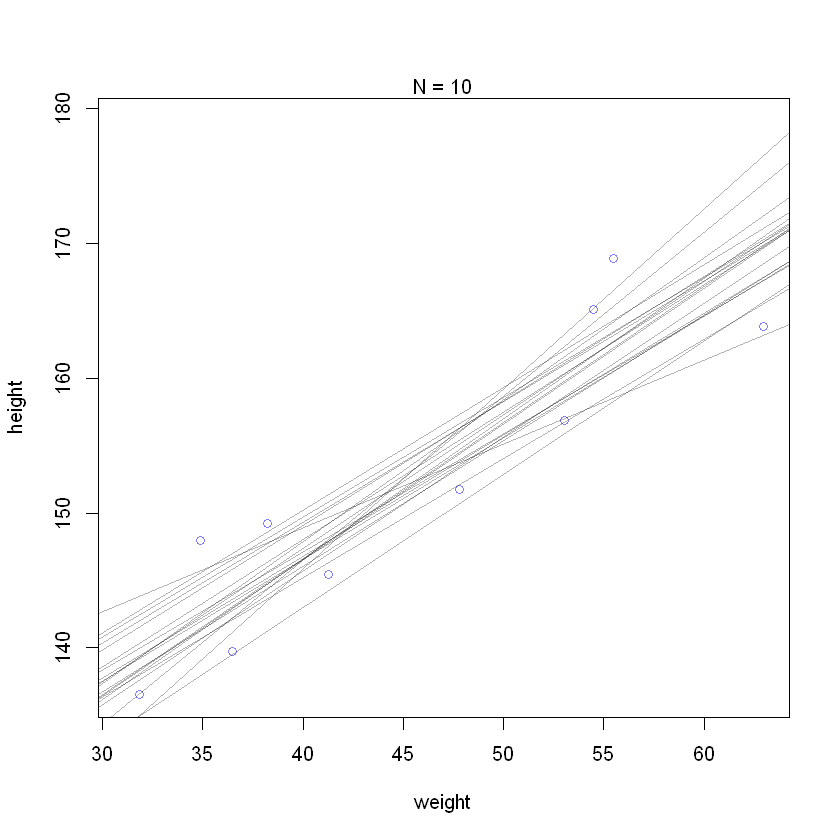

In [109]:
 # extract 20 samples from the posterior
post <- extract.samples( mN , n=20 )

# display raw data and sample size
plot( dN$weight , dN$height ,
    xlim=range(d2$weight) , ylim=range(d2$height) ,
    col=rangi2 , xlab="weight" , ylab="height" )
mtext(concat("N = ",N))

# plot the lines, with transparency
for ( i in 1:20 )
    abline( a=post$a[i] , b=post$b[i] , col=col.alpha("black",0.3) )

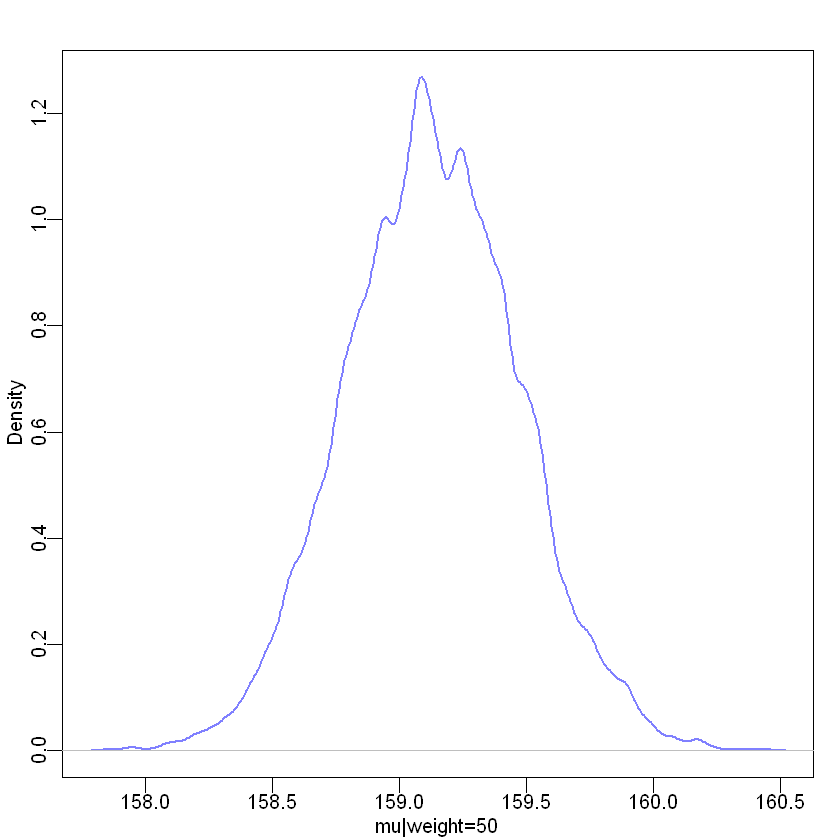

In [113]:
mu_at_50 <- post$a + post$b * 50

dens( mu_at_50 , col=rangi2 , lwd=2 , xlab="mu|weight=50" )

In [114]:
HPDI( mu_at_50 , prob=0.89 )

|0.89    0.89| 
158.5815 159.6674

In [116]:
mu <- link( m4.3 )
str(mu)

[ 1000 / 1000 ]
 num [1:1000, 1:352] 157 157 157 157 158 ...


<font color = 'green'>What link will do is take your map model fit, sample from the posterior distribution,
and then compute µ for each case in the data and sample from the posterior distribution.</font>

In [117]:
# define sequence of weights (of people) to compute predictions for 4.54
# these values will be on the horizontal axis
weight.seq <- seq( from=25 , to=70 , by=1 )

# use link to compute mu
# for each sample from posterior
# and for each weight in weight.seq
mu <- link( m4.3 , data=data.frame(weight=weight.seq) )
str(mu)

[ 1000 / 1000 ]
 num [1:1000, 1:46] 134 135 137 138 135 ...


<img src='pics/SR_b16.png' alt='Drawing' style='width: 350pt'/>

## Deconstruction of Link

In [137]:
post <- extract.samples(m4.3)
mu.link <- function(weight) post$a + post$b*weight
weight.seq <- seq(from=25, to=70, by=1)
mu <- sapply(weight.seq,mu.link)
mu.mean <- apply(mu,2,mean)
mu.HPDI <- apply(mu,2,HPDI)

In [140]:
mu.HPDI
mu.mean

|0.89,135.1904,136.1409,137.1093,138.0436,139.0453,140.0007,140.9426,141.9170,142.8946,143.8200,...,167.8985,168.7328,169.5720,170.3901,171.2433,172.0922,172.9621,173.8014,174.6655,175.5067
0.89|,137.9867,138.8116,139.6508,140.4592,141.3383,142.1647,142.9912,143.8434,144.6972,145.5075,...,170.2171,171.1756,172.1372,173.0803,174.0596,175.0376,176.0303,177.0015,177.9892,178.9571


[1] 136.5181 137.4225 138.3269 139.2313 140.1357 141.0401 141.9445 142.8489
 [9] 143.7533 144.6577 145.5621 146.4665 147.3709 148.2752 149.1796 150.0840
[17] 150.9884 151.8928 152.7972 153.7016 154.6060 155.5104 156.4148 157.3192
[25] 158.2236 159.1279 160.0323 160.9367 161.8411 162.7455 163.6499 164.5543
[33] 165.4587 166.3631 167.2675 168.1719 169.0763 169.9807 170.8850 171.7894
[41] 172.6938 173.5982 174.5026 175.4070 176.3114 177.2158

In [161]:
#sample from posterior
post <- extract.samples(m4.3)
post %>% str()

'data.frame':	10000 obs. of  3 variables:
 $ a    : num  110 110 113 114 114 ...
 $ b    : num  0.976 0.996 0.911 0.907 0.891 ...
 $ sigma: num  4.72 4.72 5.09 5.13 5.01 ...


In [162]:
# define link function
mu.link <- function(weight) post$a + post$b*weight
mu.link(50) %>% str()

 num [1:10000] 159 160 159 159 159 ...


In [163]:
# define weight values to compute predictions for
weight.seq <- seq(from=25, to=70, by=1)
weight.seq %>% str()

 num [1:46] 25 26 27 28 29 30 31 32 33 34 ...


In [164]:
#compute prediction for each sample in posterior, for each weight value
mu <- sapply(weight.seq,mu.link)
# sapply takes every weight in weight.seq and passes it to the function 
# mu.link, then returns a vector, and stores that vector in a matrix
# s in sapplystands for simplify <- the answer is a list of vectors, 
# so the 's' puts tose vectors into a matrix
mu %>% str()

 num [1:10000, 1:46] 135 135 136 137 137 ...


In [165]:
1:10

[1]  1  2  3  4  5  6  7  8  9 10

In [166]:
sapply(1:10, function(z) z^2)

[1]   1   4   9  16  25  36  49  64  81 100

In [167]:
sapply(1:10, function(z) prod(1:z)^(1/z)) %>% round(2)

[1] 1.00 1.41 1.82 2.21 2.61 2.99 3.38 3.76 4.15 4.53

In [168]:
# summarise
mu.mean <- apply(mu,2,mean) # 2 refers to second dimension 
#i.e. columns as opposed to rows <- rows=1
mu %>% str()

 num [1:10000, 1:46] 135 135 136 137 137 ...


In [169]:
mu.HPDI <- apply(mu,2,HPDI) # takes the mean of every column in mu
mu.HPDI %>% str()

 num [1:2, 1:46] 135 138 136 139 137 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:2] "|0.89" "0.89|"
  ..$ : NULL


In [170]:
# summarize the distribution of mu 
mu.mean <- apply( mu , 2 , mean )
mu.HPDI <- apply( mu , 2 , HPDI , prob=0.89 )

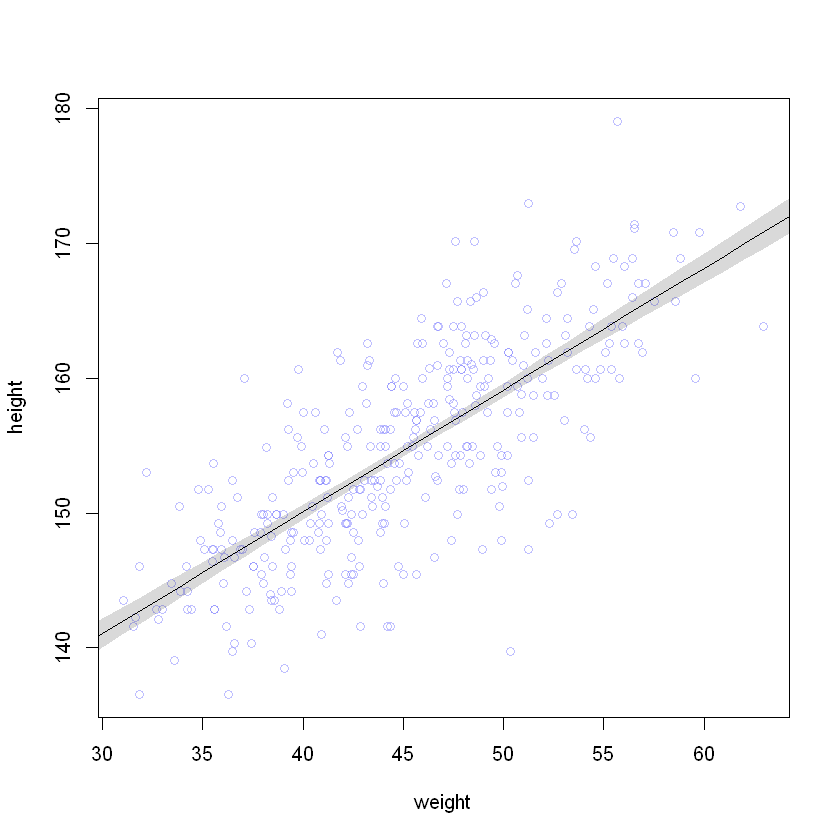

In [173]:
# plot raw data
# fading out points to make line and interval more visible
plot( height ~ weight , data=d2 , col=col.alpha(rangi2,0.5) )

# plot the MAP line, aka the mean mu for each weight
lines( weight.seq , mu.mean )

# plot a shaded region for 89% HPDI
shade( mu.HPDI , weight.seq )

<img src='pics/SR_b17.png' alt='Drawing' style='width: 450pt'/>

In [175]:
sim.height <- sim(m4.3, data=list(weight=weight.seq))
str(sim.height)

[ 1000 / 1000 ]
 num [1:1000, 1:46] 136 142 142 141 126 ...


**<font color = 'purple'>incorporating sigma into the graph</font>** <- predicted heights are not all going to fall on the line, but scattered around the line, and sigma tells you that.

* there's uncertainty from the posterior and that contributes to prediction uncertainty, and
* then there's uncertainty from the process, and that uncertainty is embodied in the likelihood function
    * even if you knew probability of water on the planet there's still uncertainty about the outcome of each globe toss (land or water)

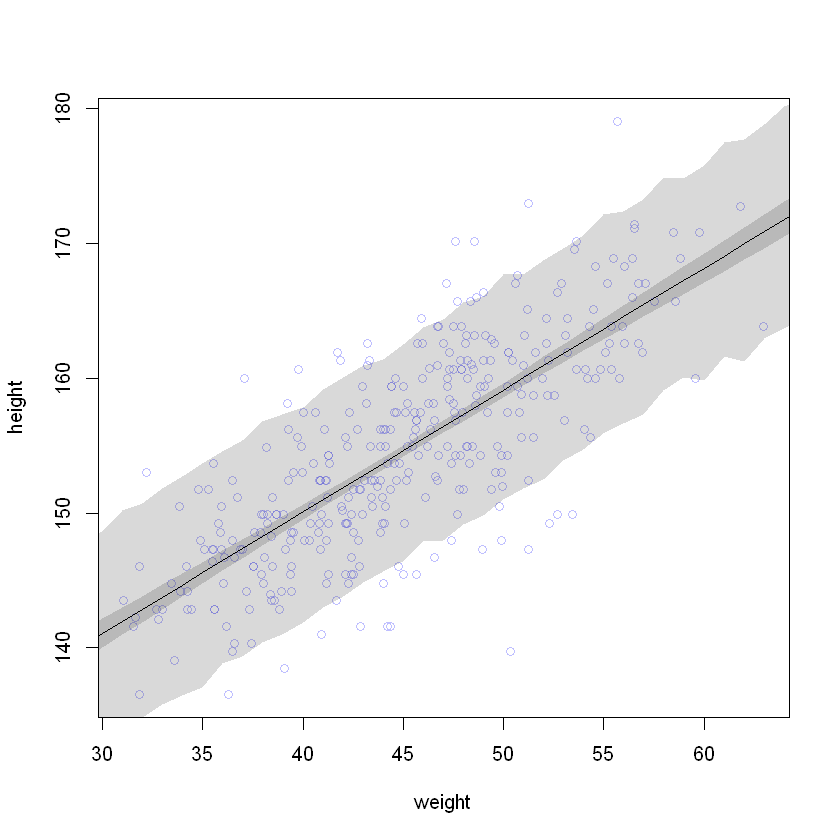

In [182]:
height.PI <- apply( sim.height , 2 , PI , prob=0.89 )

 # plot raw data
plot( height ~ weight , d2 , col=col.alpha(rangi2,0.5) )

# draw MAP line
lines( weight.seq , mu.mean )

# draw HPDI region for line
shade( mu.HPDI , weight.seq )

# draw PI region for simulated heights
shade( height.PI , weight.seq )

### How sim works

<img src='pics/SR_b18.png' alt='Drawing' style='width: 350pt'/>

In [195]:
post <- extract.samples(m4.3)
weight.seq <- 25:70
sim.height <- sapply( weight.seq , function(weight)
    rnorm( # generate a random normal
        n=nrow(post) ,  # one for each row in the posterior distribution
        mean=post$a + post$b*weight , # where are mean is our defn of mu
        sd=post$sigma ) )             # and the std dev is sigma 
height.PI <- apply( sim.height , 2 , PI , prob=0.89 ) 
                     # gives percentile interval  <- i.e. an interval 
                     # with the same probability on each tail

In [196]:
height.PI

5%,128.2344,129.3459,130.0623,130.9431,132.1201,132.8307,133.7421,134.5932,135.5284,136.7211,...,160.9102,161.9420,162.6802,163.3961,164.4731,165.2166,166.1853,167.0419,168.1696,168.9738
94%,144.7526,145.7920,146.4197,147.2685,148.2685,149.4207,150.1277,151.2701,151.8630,152.8386,...,177.3972,178.2225,179.1776,180.0328,180.9583,181.8761,182.7325,183.6668,184.6159,185.3851


<img src='pics/test' alt='Drawing' style='width:150pt'/>


## Polynomial regression

<img src='pics/SR_b13.png' alt='Drawing' style='width: 250pt'/>

<font color = 'red'>The super frustrating thing about statistical jargon is that linear models are not linear, not in the prediction space. The linearity has to do with the additiveness the model of the mean: that's what's linear about them. But when you draw predictions in a scatterplot they don't have to be straight lines.</font>

<img src='pics/SR_b14.png' alt='Drawing' style='width: 350pt'/>

<img src='pics/SR_e20.png' alt='Drawing' style='width:250pt'/>

In [200]:
d$weight.s <- ( d$weight - mean(d$weight) )/sd(d$weight)

<img src='pics/SR_f22.png' alt='Drawing' style='width:325pt'/>

In [201]:
d$weight.s2 <- d$weight.s^2
m4.5 <- map(
    alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a + b1*weight.s + b2*weight.s2 ,
        a ~ dnorm( 178 , 100 ) ,
        b1 ~ dnorm( 0 , 10 ) ,
        b2 ~ dnorm( 0 , 10 ) ,
        sigma ~ dunif( 0 , 50 )
    ) ,
    data=d )

In [202]:
precis( m4.5 )

        Mean StdDev   5.5%  94.5%
a     146.66   0.37 146.07 147.26
b1     21.40   0.29  20.94  21.86
b2     -8.42   0.28  -8.86  -7.97
sigma   5.75   0.17   5.47   6.03

<font color = 'red'>problem with parabolic models is that they do crazy things at the limits of your data</font>

<img src='pics/SR_f23.png' alt='Drawing' style='width:325pt'/>

# Multivariate models

## load data

In [214]:
# load data
library(rethinking)
data(WaffleDivorce)
d <- WaffleDivorce

# standardize predictor
d$MedianAgeMarriage.s <- (d$MedianAgeMarriage-mean(d$MedianAgeMarriage))/
    sd(d$MedianAgeMarriage)

# fit model
m5.1 <- map(
    alist(
        Divorce ~ dnorm( mu , sigma ) ,
        mu <- a + bA * MedianAgeMarriage.s ,
        a ~ dnorm( 10 , 10 ) ,
        bA ~ dnorm( 0 , 1 ) ,
        sigma ~ dunif( 0 , 10 )
    ) , data = d )

## (5.1.) Spurious association

* they're actual causal relationships between things and you can't detect them or see them unless you have more than one predictor variable at the models because causes are in conflict in natural systems.
* it is not harmless to just add stuff to a model, it actually totally distorts your inference.

<img src='pics/SR_f24.png' alt='Drawing' style='width:325pt'/>

<img src='pics/SR_f25.png' alt='Drawing' style='width:325pt'/>

you can have variables that are causally related but if you look at their correlation it could be zero 

* the simple example: say you have a machine and you input into it positive and negative numbers 2 minus 2 4 minus 4 and it outputs the square of the input. There will be zero correlation between the inputs and the outputs but but there the employee is perfectly determining of the output they're definitely causally related but there's zero correlation.

## (5.1.1.) Multivariate notation. 

<img src='pics/SR_f26.png' alt='Drawing' style='width:325pt'/>

<font color = 'purple'>mutlivariate linear regression answers the question:</font>
What is the value of a predictor once we know the value of other predictors. i.e., once you know a state's mariage rate, is there any additional predictive power of knowing the state's median marriage rate$-$and vice versa

<img src='pics/SR_f27.png' alt='Drawing' style='width:325pt'/>

## (5.1.2.) Fitting the model. 

<img src='pics/SR_f28.png' alt='Drawing' style='width:325pt'/>

<img src='pics/SR_f29.png' alt='Drawing' style='width:325pt'/>

map just executes your formula list

In [216]:
 d$Marriage.s <- (d$Marriage - mean(d$Marriage))/sd(d$Marriage)

In [217]:
m5.3 <- map(
    alist(
        Divorce ~ dnorm( mu , sigma ) ,
        mu <- a + bR*Marriage.s + bA*MedianAgeMarriage.s ,
        a ~ dnorm( 10 , 10 ) ,
        bR ~ dnorm( 0 , 1 ) ,
        bA ~ dnorm( 0 , 1 ) ,
        sigma ~ dunif( 0 , 10 )
    ) ,
    data = d )

In [218]:
precis( m5.3 )

       Mean StdDev  5.5% 94.5%
a      9.69   0.20  9.36 10.01
bR    -0.13   0.28 -0.58  0.31
bA    -1.13   0.28 -1.58 -0.69
sigma  1.44   0.14  1.21  1.67

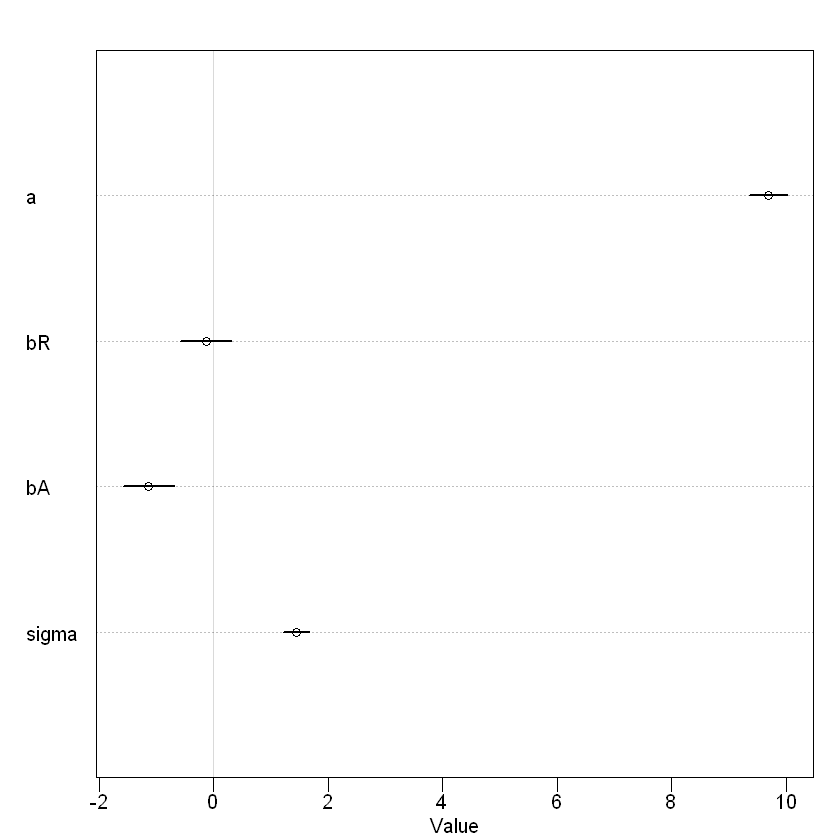

In [219]:
precis(m5.3) %>% plot()

<img src='pics/SR_f31.png' alt='Drawing' style='width:325pt'/>

<img src='pics/SR_f30.png' alt='Drawing' style='width:275pt'/>